!git clone https://github.com/June103310110/open_ai_course.git

import sys
sys.path.append('/content/open_ai_course')

![時間序列的應用場景](assets/data_science_solar/時間序列的應用場景.png)

# **Import**

In [1]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import warnings
warnings.filterwarnings("ignore")

# **1. Data Import & Structure**

In [2]:
data_dkasc = pd.read_csv('data/dkasc_data_2018_2021.csv')
data_dkasc.head()

print(data_dkasc.head())
print(data_dkasc.columns)
print(data_dkasc.shape)


             timestamp  Current_Phase_Average_Mean  \
0  2018-01-01 00:00:00                    0.666043   
1  2018-01-01 00:15:00                    0.665912   
2  2018-01-01 00:30:00                    0.665266   
3  2018-01-01 00:45:00                    0.666446   
4  2018-01-01 01:00:00                    0.666483   

   Active_Energy_Delivered_Received  Active_Power  Wind_Speed  \
0                      343615.40625           0.0    1.836667   
1                      343615.37500           0.0    1.603333   
2                      343615.37500           0.0    2.296667   
3                      343615.37500           0.0    3.203333   
4                      343615.37500           0.0    8.803333   

   Weather_Temperature_Celsius  Global_Horizontal_Radiation  Wind_Direction  \
0                    27.799999                    -1.361402      124.766670   
1                    27.876667                    -1.269423      132.466660   
2                    27.750000                 

In [3]:
data_dkasc.head()

,timestamp,Current_Phase_Average_Mean,Active_Energy_Delivered_Received,Active_Power,Wind_Speed,Weather_Temperature_Celsius,Global_Horizontal_Radiation,Wind_Direction,Weather_Daily_Rainfall,Max_Wind_Speed,Air_Pressure,Hail_Accumulation,Pyranometer_1,Temperature_Probe_1,Temperature_Probe_2
0,2018-01-01 00:00:00,0.666043,343615.40625,0.0,1.836667,27.799999,-1.361402,124.766670,0.000000,3.7,949.606628,0.0,-1.299650,41.853165,41.671333
1,2018-01-01 00:15:00,0.665912,343615.37500,0.0,1.603333,27.876667,-1.269423,132.466660,0.000000,3.0,949.423340,0.0,-1.219044,41.970066,41.797428
2,2018-01-01 00:30:00,0.665266,343615.37500,0.0,2.296667,27.750000,-1.546097,136.899994,0.000000,4.4,949.153320,0.0,-1.152630,42.035572,41.906910
3,2018-01-01 00:45:00,0.666446,343615.37500,0.0,3.203333,27.043333,-3.457992,214.633331,0.002667,8.0,949.976685,0.0,-3.275535,40.662575,40.578434
4,2018-01-01 01:00:00,0.666483,343615.37500,0.0,8.803333,21.893333,0.564412,313.733337,0.116667,17.5,952.226685,0.0,0.915809,38.969547,38.972843


In [4]:
data_dkasc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85644 entries, 0 to 85643
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   timestamp                         85644 non-null  object 
 1   Current_Phase_Average_Mean        85644 non-null  float64
 2   Active_Energy_Delivered_Received  85644 non-null  float64
 3   Active_Power                      85644 non-null  float64
 4   Wind_Speed                        85644 non-null  float64
 5   Weather_Temperature_Celsius       85644 non-null  float64
 6   Global_Horizontal_Radiation       85644 non-null  float64
 7   Wind_Direction                    85644 non-null  float64
 8   Weather_Daily_Rainfall            85644 non-null  float64
 9   Max_Wind_Speed                    85644 non-null  float64
 10  Air_Pressure                      85644 non-null  float64
 11  Hail_Accumulation                 85644 non-null  float64
 12  Pyra

In [5]:
data_dkasc['timestamp'] = pd.to_datetime(data_dkasc['timestamp'])
# 篩選指定月份的資料（以1月為例）
filtered_df = data_dkasc[data_dkasc['timestamp'].dt.month == 1]

# # 顯示結果
filtered_df

,timestamp,Current_Phase_Average_Mean,Active_Energy_Delivered_Received,Active_Power,Wind_Speed,Weather_Temperature_Celsius,Global_Horizontal_Radiation,Wind_Direction,Weather_Daily_Rainfall,Max_Wind_Speed,Air_Pressure,Hail_Accumulation,Pyranometer_1,Temperature_Probe_1,Temperature_Probe_2
0,2018-01-01 00:00:00,0.666043,343615.40625,0.0,1.836667,27.799999,-1.361402,124.766670,0.000000,3.7,949.606628,0.0,-1.299650,41.853165,41.671333
1,2018-01-01 00:15:00,0.665912,343615.37500,0.0,1.603333,27.876667,-1.269423,132.466660,0.000000,3.0,949.423340,0.0,-1.219044,41.970066,41.797428
2,2018-01-01 00:30:00,0.665266,343615.37500,0.0,2.296667,27.750000,-1.546097,136.899994,0.000000,4.4,949.153320,0.0,-1.152630,42.035572,41.906910
3,2018-01-01 00:45:00,0.666446,343615.37500,0.0,3.203333,27.043333,-3.457992,214.633331,0.002667,8.0,949.976685,0.0,-3.275535,40.662575,40.578434
4,2018-01-01 01:00:00,0.666483,343615.37500,0.0,8.803333,21.893333,0.564412,313.733337,0.116667,17.5,952.226685,0.0,0.915809,38.969547,38.972843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69565,2021-01-29 22:45:00,0.611783,853361.18750,0.0,2.940000,28.799999,-1.449275,172.666672,0.000000,5.2,950.306641,0.0,-1.352469,42.797253,42.738804
69566,2021-01-29 23:00:00,0.613929,853361.12500,0.0,3.336667,28.700001,-1.287286,165.633331,0.000000,6.8,950.443359,0.0,-1.177351,42.745243,42.678722
69567,2021-01-29 23:15:00,0.617438,853361.12500,0.0,2.940000,28.500000,-1.280166,172.133331,0.000000,5.2,950.406677,0.0,-1.183907,42.650463,42.591930
69568,2021-01-29 23:30:00,0.618666,853361.12500,0.0,3.016667,28.210001,-1.308100,173.366669,0.000000,6.2,950.330017,0.0,-1.172214,42.504520,42.450951


In [6]:
import pandas as pd
import numpy as np

def add_cyclic_features(df, timestamp_col='timestamp', drop_original=True):
    """
    為時間戳數據添加週期性特徵（sine 和 cosine），包括月份、天數、時間。
    
    參數:
    - df (pd.DataFrame): 包含時間戳的 DataFrame。
    - timestamp_col (str): 時間戳列的名稱，預設為 'timestamp'。
    - drop_original (bool): 是否刪除原始時間戳列，預設為 True。
    
    回傳:
    - pd.DataFrame: 包含週期性特徵的 DataFrame。
    """
    # 確保時間戳為 datetime 格式
    df[timestamp_col] = pd.to_datetime(df[timestamp_col])
    
    # 提取時間相關特徵
    tmp = pd.DataFrame()
    tmp['month'] = df[timestamp_col].dt.month
    tmp['day'] = df[timestamp_col].dt.day
    tmp['hour'] = df[timestamp_col].dt.hour
    tmp['minute'] = df[timestamp_col].dt.minute
    
    # 添加月份的 sine 和 cosine 特徵
    df['month_sin'] = np.sin(tmp['month'] * (2. * np.pi / 12))
    df['month_cos'] = np.cos(tmp['month'] * (2. * np.pi / 12))
    
    # 添加天數的 sine 和 cosine 特徵 (假設30天為一個週期)
    df['day_sin'] = np.sin(tmp['day'] * (2. * np.pi / 30))
    df['day_cos'] = np.cos(tmp['day'] * (2. * np.pi / 30))
    
    # 計算時間（以小時為單位）
    tmp['time_in_hours'] = tmp['hour'] + tmp['minute'] / 60
    
    # 添加時間的 sine 和 cosine 特徵 (假設24小時為一個週期)
    df['time_sin'] = np.sin(tmp['time_in_hours'] * (2. * np.pi / 24))
    df['time_cos'] = np.cos(tmp['time_in_hours'] * (2. * np.pi / 24))
    
    # 刪除原始時間戳列（可選）
    if drop_original:
        df.drop(columns=[timestamp_col], inplace=True)
    
    return df



In [7]:
data_dkasc = add_cyclic_features(data_dkasc, 'timestamp', drop_original=False)


In [8]:
data_dkasc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85644 entries, 0 to 85643
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   timestamp                         85644 non-null  datetime64[ns]
 1   Current_Phase_Average_Mean        85644 non-null  float64       
 2   Active_Energy_Delivered_Received  85644 non-null  float64       
 3   Active_Power                      85644 non-null  float64       
 4   Wind_Speed                        85644 non-null  float64       
 5   Weather_Temperature_Celsius       85644 non-null  float64       
 6   Global_Horizontal_Radiation       85644 non-null  float64       
 7   Wind_Direction                    85644 non-null  float64       
 8   Weather_Daily_Rainfall            85644 non-null  float64       
 9   Max_Wind_Speed                    85644 non-null  float64       
 10  Air_Pressure                      85644 non-nu

In [9]:
import pandas as pd

def analyze_single_dataframe(df, df_name='data'):
    """
    分析單個 DataFrame 的基本統計特性，並統一數值格式為科學記號。

    參數:
    - df: 要分析的 DataFrame
    - df_name: DataFrame 的名稱，用於標記輸出

    回傳:
    - pd.DataFrame: 統計資訊結果
    """
    # 統計指標
    stats = ['min', 'max', 'mean', 'std', 'var']

    # 計算 DataFrame 的統計資訊
    df_stats = df.agg(stats).T

    # 重命名列以便區分
    df_stats.columns = [f"{stat}_{df_name}" for stat in stats]

    # 將所有數值統一為科學記號格式
    pd.options.display.float_format = '{:.2e}'.format

    return df_stats

# 示例：分析 data_dkasc 的統計資訊
data_dkasc_stats = analyze_single_dataframe(data_dkasc.drop(columns=['timestamp']), df_name='data_dkasc')
data_dkasc_stats


,min_data_dkasc,max_data_dkasc,mean_data_dkasc,std_data_dkasc,var_data_dkasc
Current_Phase_Average_Mean,0.00e+00,1.52e+02,2.87e+01,4.28e+01,1.83e+03
Active_Energy_Delivered_Received,3.44e+05,1.03e+06,6.67e+05,1.99e+05,3.95e+10
Active_Power,0.00e+00,1.02e+02,1.91e+01,2.92e+01,8.55e+02
Wind_Speed,5.33e-02,1.29e+01,2.03e+00,1.22e+00,1.49e+00
Weather_Temperature_Celsius,-1.70e+00,4.66e+01,2.15e+01,9.00e+00,8.11e+01
Global_Horizontal_Radiation,-1.50e+01,1.47e+03,2.44e+02,3.38e+02,1.14e+05
Wind_Direction,1.03e+01,3.48e+02,1.68e+02,5.75e+01,3.31e+03
Weather_Daily_Rainfall,-3.00e+08,1.36e-01,-1.05e+04,1.78e+06,3.15e+12
Max_Wind_Speed,2.00e-01,2.43e+01,3.85e+00,2.31e+00,5.35e+00
Air_Pressure,9.39e+02,9.74e+02,9.58e+02,5.67e+00,3.21e+01


![時間序列的特性分析](assets/data_science_solar/時間序列的特性分析.png)

### 相關係數

In [10]:
print('data_dkasc', data_dkasc.corr()['Active_Power'])

data_dkasc timestamp                          -1.06e-01
Current_Phase_Average_Mean          1.00e+00
Active_Energy_Delivered_Received   -1.13e-01
Active_Power                        1.00e+00
Wind_Speed                          4.07e-01
Weather_Temperature_Celsius         3.67e-01
Global_Horizontal_Radiation         8.73e-01
Wind_Direction                     -1.64e-01
Weather_Daily_Rainfall              3.52e-03
Max_Wind_Speed                      4.75e-01
Air_Pressure                       -3.84e-02
Hail_Accumulation                   3.52e-03
Pyranometer_1                       8.64e-01
Temperature_Probe_1                 7.70e-01
Temperature_Probe_2                 7.79e-01
month_sin                           9.69e-02
month_cos                           1.13e-01
day_sin                             3.61e-03
day_cos                            -9.91e-03
time_sin                           -9.74e-02
time_cos                           -7.44e-01
Name: Active_Power, dtype: float64


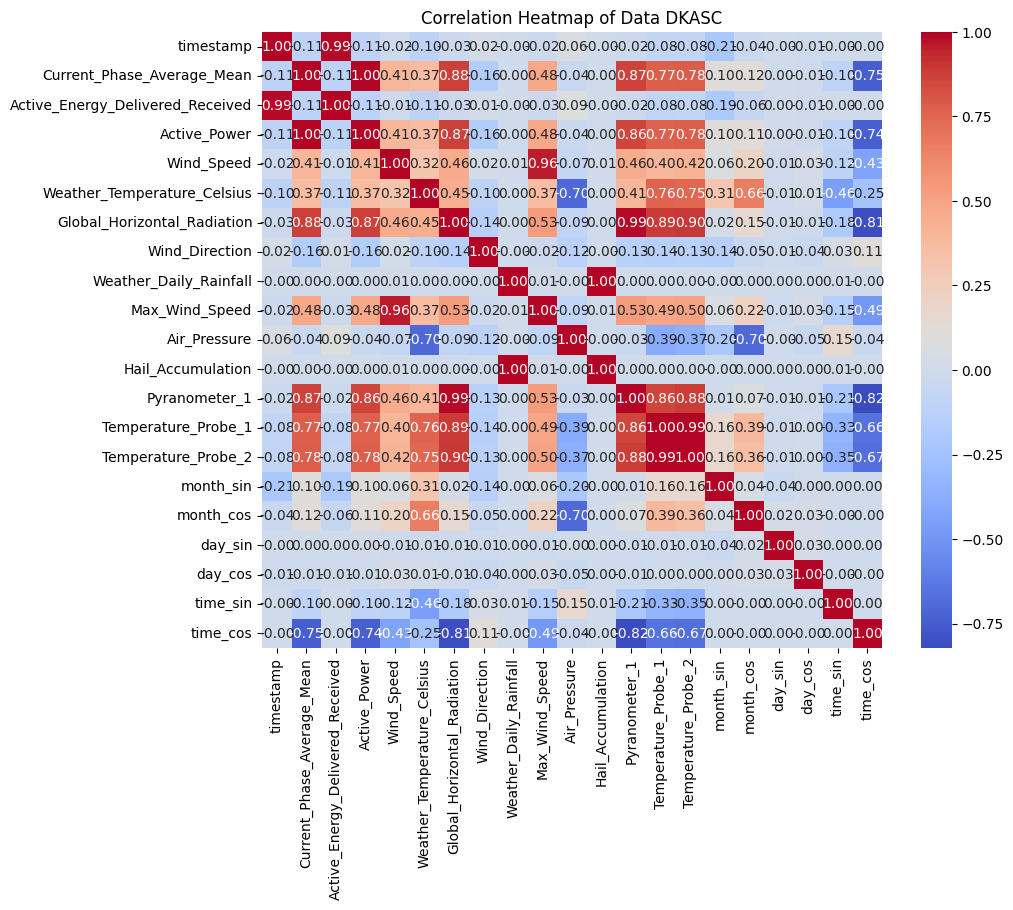

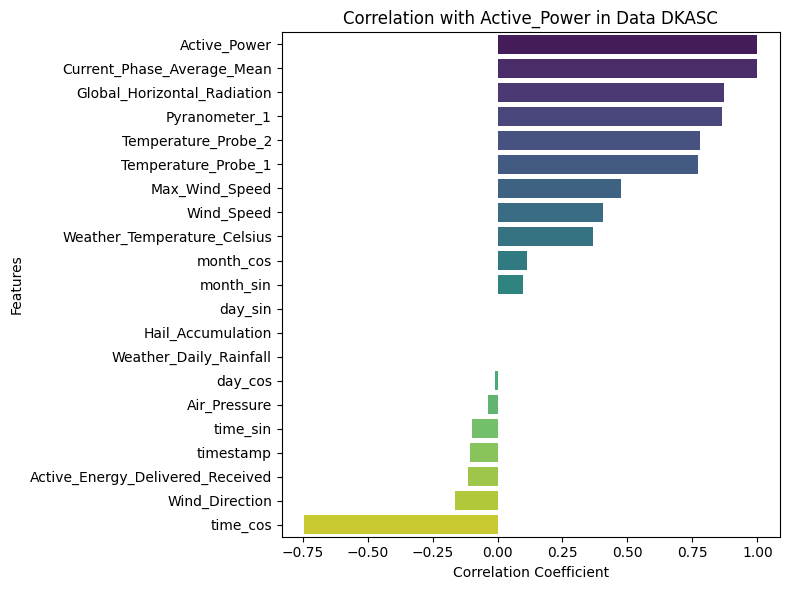

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_correlation_heatmap(df, target_column='Active_Power', df_name='data'):
    """
    繪製 DataFrame 的相關係數熱圖，並突出顯示與目標欄位的相關性。

    參數:
    - df: 要分析的 DataFrame
    - target_column: 目標欄位，用於顯示其相關性
    - df_name: DataFrame 的名稱，用於標記輸出
    """
    # 計算相關係數
    correlation_matrix = df.corr()

    # 繪製完整相關係數熱圖
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
    plt.title(f"Correlation Heatmap of {df_name}")
    plt.show()

    # 顯示與目標欄位的相關性
    target_correlation = correlation_matrix[target_column].sort_values(ascending=False)
    plt.figure(figsize=(8, 6))
    sns.barplot(x=target_correlation.values, y=target_correlation.index, palette='viridis')
    plt.title(f"Correlation with {target_column} in {df_name}")
    plt.xlabel("Correlation Coefficient")
    plt.ylabel("Features")
    plt.tight_layout()
    plt.show()

plot_correlation_heatmap(data_dkasc, target_column='Active_Power', df_name='Data DKASC')


## 控制變量
1. <0的clip到0
2. 移除降雨量 (兩地差異太大，可以被Global_Horizontal_Radiation取代)
3. dkasc activate power 正規化

是否要移除降雨量是個問題，降雨量物理上看起來跟發電量有關，但這件事可以被反應在Global_Horizontal_Radiation。看起來有更高的相關性
因為資料中的降雨量接近0，我這裡把它移除

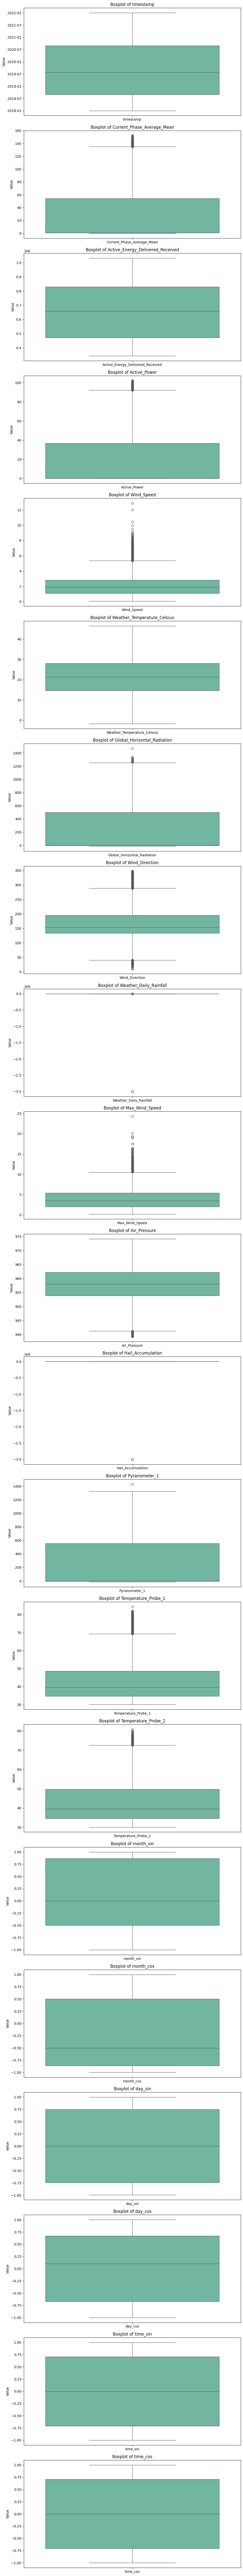

In [12]:
def boxplot_single_dataframe(df, df_name='data'):
    """
    對單個 DataFrame 的每個欄位繪製箱型圖。

    參數:
    - df: 要分析的 DataFrame
    - df_name: DataFrame 的名稱，用於標記輸出
    """
    # 將 DataFrame 轉換為長格式
    df_long = df.melt(var_name='Feature', value_name='Value')
    df_long['Dataset'] = df_name

    # 繪製箱型圖
    num_features = len(df.columns)
    fig, axes = plt.subplots(num_features, 1, figsize=(10, 5 * num_features), sharex=False)

    if num_features == 1:
        axes = [axes]  # 保持 axes 為列表方便迭代處理

    for i, feature in enumerate(df.columns):
        sns.boxplot(
            data=df_long[df_long['Feature'] == feature],
            x='Feature', y='Value', ax=axes[i], palette='Set2'
        )
        axes[i].set_title(f"Boxplot of {feature}")
        axes[i].set_ylabel("Value")
        axes[i].set_xlabel("")

    plt.tight_layout()
    plt.show()

boxplot_single_dataframe(data_dkasc, df_name='Data DKASC')


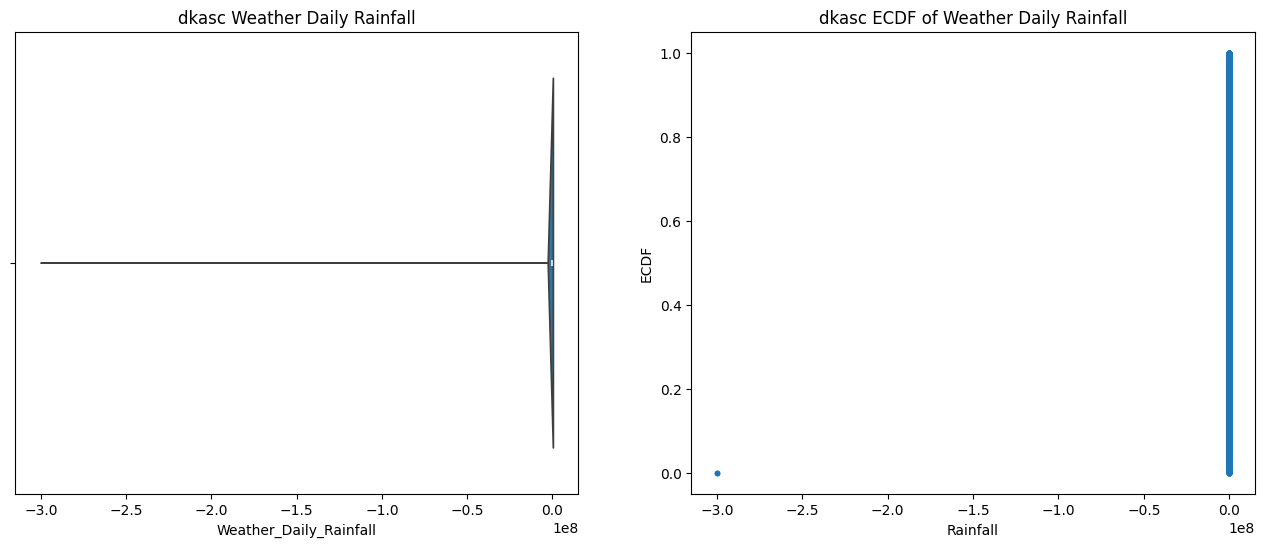

In [13]:
'單變數分析的其他好工具'
# plt.boxplot(data_dkasc['Weather_Daily_Rainfall'])
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16,6))
plt.subplot(121)
sns.violinplot(x=data_dkasc["Weather_Daily_Rainfall"])
plt.title("dkasc Weather Daily Rainfall")
# plt.show()

# import seaborn as sns
plt.subplot(122)
x = np.sort(data_dkasc["Weather_Daily_Rainfall"])
y = np.arange(1, len(x) + 1) / len(x)
plt.plot(x, y, marker=".", linestyle="none")
plt.title("dkasc ECDF of Weather Daily Rainfall")
plt.xlabel("Rainfall")
plt.ylabel("ECDF")


plt.show()


In [14]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

def standardize_and_normalize(df, columns):
    """
    對指定的 DataFrame 欄位進行標準化（Standardization）後再進行正規化（Normalization）。
    
    Args:
        df (pd.DataFrame): 輸入的 DataFrame。
        columns (list): 要進行處理的欄位名稱列表。
        
    Returns:
        pd.DataFrame: 返回一個新的 DataFrame，處理過的欄位為標準化後再正規化的結果。
    """
    df_copy = df.copy()
    
    for col in columns:
        # 檢查欄位是否在 DataFrame 中
        if col not in df_copy.columns:
            raise ValueError(f"欄位 '{col}' 不存在於 DataFrame 中")
        
        # 標準化
        scaler_standard = StandardScaler()
        standardized = scaler_standard.fit_transform(df_copy[[col]])
        
        # 正規化
        scaler_minmax = MinMaxScaler(feature_range=(0, 1))
        normalized = scaler_minmax.fit_transform(standardized)
        
        # 更新 DataFrame
        df_copy[col] = normalized.flatten()
    
    return df_copy



In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split

def split_dataframe(df, test_size=0.2, random_state=None, reset_index=True):
    """
    將 DataFrame 分為訓練集和測試集，並選擇是否重置索引。
    
    參數:
    - df: 原始 DataFrame
    - test_size: 測試集比例 (默認 0.2)
    - random_state: 隨機種子 (默認 None)
    - reset_index: 是否重置索引 (默認 True)
    
    回傳:
    - train_df: 訓練集 DataFrame
    - test_df: 測試集 DataFrame
    """
    # 使用 sklearn 的 train_test_split 分割數據
    train_df, test_df = train_test_split(df, test_size=test_size, random_state=random_state, shuffle=False)
    
    # 重置索引（選擇性）
    if reset_index:
        train_df = train_df.reset_index(drop=True)
        test_df = test_df.reset_index(drop=True)
    
    return train_df, test_df




![時間序列的特徵](assets/data_science_solar/時間序列的特徵.png)

### Final Processing


In [16]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

'將感測器數值合理校正clip到0'
for col in ['Wind_Speed', 'Wind_Direction', 'Weather_Daily_Rainfall', 'Global_Horizontal_Radiation']:
    data_dkasc.loc[:, col] = data_dkasc.loc[:, col].clip(lower=0)


# 是否要移除降雨量是個問題，降雨量物理上看起來跟發電量有關，但這件事可以被反應在Global_Horizontal_Radiation。看起來有更高的相關性 因為兩個資料的降雨量相差太大，我這裡把它移除
drop_col = ['Weather_Daily_Rainfall']
for col in drop_col:
    if col in data_dkasc.columns:
        data_dkasc = data_dkasc.drop(col, axis=1)

# 降採樣、切分資料
# data_dkasc = data_dkasc.loc[:96*90, :]
# data_taipower = data_taipower.loc[:96*90, :]
# data_dkasc, test_dkasc = split_dataframe(data_dkasc)
# data_taipower, test_taipower = split_dataframe(data_taipower)

In [17]:
import pandas as pd

def split_data_by_month(df, train_months, test_months):
    """
    按照月份將資料分為訓練集和測試集。

    參數:
        df (pd.DataFrame): 包含 timestamp 欄位的 DataFrame。
        train_months (list): 訓練集的月份列表 (1-12)。
        test_months (list): 測試集的月份列表 (1-12)。

    返回:
        tuple: (訓練集 DataFrame, 測試集 DataFrame)
    """
    # 確保 timestamp 欄位為 datetime 格式
    assert 'timestamp' in df.columns, 'timestamp欄位不再dataframe內'
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    
    
    # 篩選訓練集和測試集
    train_df = df[df['timestamp'].dt.month.isin(train_months)]
    test_df = df[df['timestamp'].dt.month.isin(test_months)]
    
    return train_df, test_df


# 降採樣、切分資料

# 用月份切分資料
month_split_train = [1,3,5,7,9,11]
month_split_test = [2,4,6,8,10,12]

data_dkasc, test_dkasc = split_data_by_month(data_dkasc, month_split_train, month_split_test)

data_dkasc.drop(columns=['timestamp'], inplace=True)
test_dkasc.drop(columns=['timestamp'], inplace=True)

# 根據資料總數降採樣資料
data_dkasc = data_dkasc.loc[:96*360, :]
test_dkasc = data_dkasc.loc[:96*180, :]

### Pre Process

In [18]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import joblib
import os
class ScalerProcessor:
    """
    用於數據標準化和正規化的處理器，針對每個欄位分別保存自己的 Scaler。
    """
    
    def __init__(self, feature_range=(0, 1)):
        """
        初始化 ScalerProcessor。
        Args:
            feature_range (tuple): 正規化的數據範圍，預設為 (0, 1)。
        """
        self.feature_range = feature_range
        self.standard_scalers = {}  # 儲存每個欄位的 StandardScaler
        self.minmax_scalers = {}    # 儲存每個欄位的 MinMaxScaler
        self.is_fitted = False      # 檢查是否已擬合

        
    def fit(self, df, columns):
        """
        擬合標準化器和正規化器，針對每個欄位分別保存 Scaler。
        Args:
            df (pd.DataFrame): 訓練數據。
            columns (list): 需要處理的欄位名稱。
        """
        for col in columns:
            # 初始化每個欄位的標準化器和正規化器
            scaler_standard = StandardScaler()
            scaler_minmax = MinMaxScaler(feature_range=self.feature_range)
            
            # 擬合標準化和正規化器
            standardized = scaler_standard.fit_transform(df[[col]])
            scaler_minmax.fit(standardized)
            
            # 保存 Scaler
            self.standard_scalers[col] = scaler_standard
            self.minmax_scalers[col] = scaler_minmax
        
        self.is_fitted = True


    # 後面都是應用方法 可以先不關注
    #=====================================
    def transform(self, df):
        """
        對數據進行標準化和正規化。
        Args:
            df (pd.DataFrame): 要處理的數據。
        Returns:
            pd.DataFrame: 處理後的數據。
        """
        if not self.is_fitted:
            raise ValueError("ScalerProcessor 尚未擬合，請先調用 fit 方法。")
        
        df_copy = df.copy()
        for col in self.standard_scalers:
            # 分別使用每個欄位的標準化器和正規化器進行轉換
            standardized = self.standard_scalers[col].transform(df_copy[[col]])
            normalized = self.minmax_scalers[col].transform(standardized)
            df_copy[col] = normalized.flatten()
        
        return df_copy
    
    def save(self, path_prefix, save_dir=None):
        """
        保存每個欄位的標準化器和正規化器。
        Args:
            path_prefix (str): 保存文件的前綴路徑（每個欄位分別保存）。
        """

        self.save_dir = save_dir
        if self.save_dir:
            os.makedirs(self.save_dir, exist_ok=True)
            
        for col in self.standard_scalers:
            std_dir = f"{path_prefix}_{col}_standard.pkl"
            minmax_dir = f"{path_prefix}_{col}_minmax.pkl"
            if self.save_dir:
                std_dir = os.path.join(self.save_dir, std_dir)
                minmax_dir = os.path.join(self.save_dir, minmax_dir)
            joblib.dump(self.standard_scalers[col], std_dir)
            joblib.dump(self.minmax_scalers[col], minmax_dir)
    
    def load(self, path_prefix, columns, load_dir):
        """
        加載每個欄位的標準化器和正規化器。
        Args:
            path_prefix (str): 保存文件的前綴路徑。
            columns (list): 欲加載的欄位名稱。
        """
        std_dir = f"{path_prefix}_{col}_standard.pkl"
        minmax_dir = f"{path_prefix}_{col}_minmax.pkl"
        
        if load_dir:
            std_dir = os.path.join(load_dir, std_dir)
            minmax_dir = os.path.join(load_dir, minmax_dir)
            
        for col in columns:
            self.standard_scalers[col] = joblib.load(std_dir)
            self.minmax_scalers[col] = joblib.load(minmax_dir)
        
        self.is_fitted = True



In [19]:
# 做標準化和正規化

dkasc_processor = ScalerProcessor(feature_range=(0, 1))
dkasc_processor.fit(data_dkasc, ['Weather_Temperature_Celsius', 'Wind_Speed', 'Wind_Direction',
       'Global_Horizontal_Radiation', 'Air_Pressure', 'Active_Power',
       'Max_Wind_Speed'])
dkasc_processor.save("dkasc_processor", 'piece_6000')
data_dkasc = dkasc_processor.transform(data_dkasc)


In [20]:
# 對測試資料apply transform
test_dkasc = dkasc_processor.transform(test_dkasc)

## 完成前處理

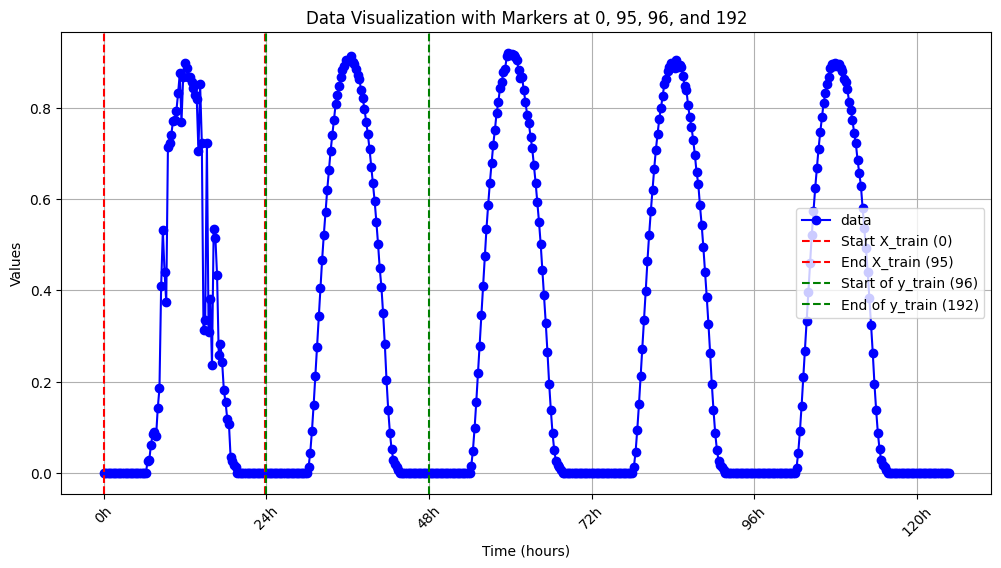

In [21]:
import matplotlib.pyplot as plt

def visualize_with_markers(data, window_size):
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # 畫出數據線
    ax.plot(range(len(data)), data, marker='o', label="data", color='b')
    
    # 在 0 和 window_size-1 (即第95個) 時間點加上紅色垂直線
    ax.axvline(x=0, color='r', linestyle='--', label='Start X_train (0)')
    ax.axvline(x=window_size-1, color='r', linestyle='--', label=f'End X_train ({window_size-1})')
    
    # 在 window_size 和 2*window_size 的位置加上綠色垂直線
    ax.axvline(x=window_size, color='g', linestyle='--', label=f'Start of y_train ({window_size})')
    ax.axvline(x=2 * window_size, color='g', linestyle='--', label=f'End of y_train ({2 * window_size})')
    
    # 設置 X 軸刻度為每 96 個點表示 24 小時
    num_points = len(data)
    time_labels = [f"{i // 96 * 24}h" for i in range(0, num_points, 96)]
    ax.set_xticks(range(0, num_points, 96))
    ax.set_xticklabels(time_labels, rotation=45)
    
    # 添加標籤和圖例
    plt.title(f"Data Visualization with Markers at 0, {window_size-1}, {window_size}, and {2*window_size}")
    plt.xlabel('Time (hours)')
    plt.ylabel('Values')
    plt.legend()
    plt.grid(True)
    
    plt.show()

window_size = 96

# 視覺化
visualize_with_markers(data_dkasc['Active_Power'][:500], window_size)

## 缺失值確認與填補

In [22]:
print(data_dkasc.isnull().any())

Current_Phase_Average_Mean          False
Active_Energy_Delivered_Received    False
Active_Power                        False
Wind_Speed                          False
Weather_Temperature_Celsius         False
Global_Horizontal_Radiation         False
Wind_Direction                      False
Max_Wind_Speed                      False
Air_Pressure                        False
Hail_Accumulation                   False
Pyranometer_1                       False
Temperature_Probe_1                 False
Temperature_Probe_2                 False
month_sin                           False
month_cos                           False
day_sin                             False
day_cos                             False
time_sin                            False
time_cos                            False
dtype: bool


![滑動視窗介紹](assets/data_science_solar/滑動視窗介紹.png)

## 整理成滑動視窗方法

**時間序列資料（Time Series Data）** 是指根據時間順序排列的數據集，每個數據點都對應於某一特定時間點或時間段。它在許多領域中廣泛應用，如金融市場分析、能源需求預測、交通流量監控等。對於台北捷運這樣的運營場景，時間序列資料可能包括每日的乘客流量、列車準點率、設備運行狀態等。

滑動視窗是一種處理時間序列數據的常用方法。它將一段固定大小的數據窗口在時間序列上以一定步長（stride）進行移動，生成多個子序列，以用於分析、特徵提取或建模。

### 滑動視窗的核心概念
    - 窗口大小（Window Size）：指定窗口的長度，通常以時間步（time steps）來表示。例如，在每小時的數據中，窗口大小為24表示一天的數據。
    - 滑動步長（Stride）：每次窗口移動的距離，通常以時間步為單位。例如，步長為1表示窗口每次移動1個時間步。
    - 重疊（Overlap）：滑動視窗可能會導致窗口之間的數據重疊。重疊程度取決於窗口大小和步長。

### 為什麼需要滑動視窗？
    - 滑動視窗在處理時間序列數據中具有重要意義，特別是在預測和分析問題中，主要原因如下：

1. 捕捉時間依賴性
    時間序列數據中的數值通常具有時間相關性，例如過去的數據會影響未來的數據。滑動視窗允許模型學習這些時間依賴性。

    應用場景：

    預測未來某個時刻的數值（如捷運乘客流量）。
    分析過去一段時間的趨勢和模式（如設備故障率變化）。
2. 生成多個數據樣本
    滑動視窗通過在整個數據序列上移動窗口，生成多個子序列，這些子序列可以作為訓練數據，增強模型的泛化能力。
    
    應用場景：
    
    在小樣本情況下通過滑動視窗擴充訓練數據。
    為每個窗口生成特徵，用於模型訓練。
3. 提供局部上下文
    滑動視窗提供了一個局部時間範圍內的數據子集，有助於捕捉短期模式或趨勢，並降低因長期變化引起的數據噪聲。
    
    應用場景：
    
    在能源需求預測中分析每日或每週的用電模式。
    在故障檢測中捕捉短期異常模式。
4. 適應模型的輸入需求
    某些機器學習模型（如LSTM、CNN）需要固定大小的數據輸入。滑動視窗可以將原始的時間序列數據轉換為固定長度的數據片段，適合這些模型的輸入要求。
    
    應用場景：
    使用RNN或LSTM模型進行時間序列預測。
    使用CNN模型進行序列模式分類。
5. 平滑化效果
    在一些應用中，滑動視窗還可以通過重疊窗口來平滑數據，減少噪聲對模型的影響。

![滑動視窗方法](assets/data_science_solar/滑動視窗方法.png)

In [26]:
import numpy as np
import pandas as pd

def create_sliding_window(data, target_col, window_size=96, predict_size=96):
    """
    建立滑動視窗資料集。結構為 輸入: 多features多時間步 輸出: 單一feature多時間步
    
    參數:
    - data: 原始數據 (pd.DataFrame)，形狀為 (samples, features)
    - target_col: 目標欄位 (str)，需存在於 data.columns
    - window_size: 滑動視窗的寬度 (int)，預設為 96
    - predict_size: 預測範圍的寬度 (int)，預設為 96
    
    回傳:
    - X: np.array，輸入數據集，形狀為 (n_samples, window_size, features)
    - y: np.array，輸出數據集，形狀為 (n_samples, predict_size, 1)
    """
    # 檢查輸入數據格式
    if not isinstance(data, pd.DataFrame):
        raise ValueError("data 必須是 pandas DataFrame 格式")
    if target_col not in data.columns:
        raise ValueError(f"目標欄位 {target_col} 不存在於 data.columns 中")
    if len(data) < window_size + predict_size:
        raise ValueError("data 的行數不足以生成滑動視窗，請確保至少有 window_size + predict_size 行數據")
    
    # 初始化結果列表
    X, y = [], []

    # 滑動窗口生成
    for i in range(len(data) - window_size - predict_size + 1):
        # 提取輸入數據（所有欄位）
        X.append(data.iloc[i:i + window_size].values)
        # 提取輸出數據（僅目標欄位）
        y.append(data.iloc[i + window_size:i + window_size + predict_size][target_col].values)
    
    # 轉為 numpy array
    X = np.array(X)
    y = np.array(y).reshape(-1, predict_size, 1)

    return X, y


In [27]:
train_set = {}
test_set = {}
window_size = 96
predict_size = 96

train_set['data_dkasc'] = create_sliding_window(data_dkasc,
                                              target_col='Active_Power',
                                              window_size=window_size, predict_size=predict_size)

test_set['data_dkasc'] = create_sliding_window(test_dkasc,
                                              target_col='Active_Power',
                                              window_size=window_size, predict_size=predict_size)


print([(prefix, data.shape) for data, prefix in zip(train_set['data_dkasc'], ['X', 'y'])])


[('X', (17569, 96, 19)), ('y', (17569, 96, 1))]


In [28]:
test_set['data_dkasc'][1].shape

(9026, 96, 1)